## 0. Import libraries, configure environment and define global variables

Importing the json library to help export whatever data we gather from the DNA sequence.

In [110]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [111]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 50
pd.options.display.float_format = '{:.3f}%'.format

Setting the fixed width for the sliding window to traverse the DNA sequence.

In [112]:
windowWidth = 3

The total number of positions of the sliding window will be the length of the sequence minus the size of the sliding window.

`len(seq) - windowSize`

## 1. Define functions

Function to create DataFrames given nucleotide information. The DataFrames will have nucleotide frequency as well as the percentage that the nucleotide make up of the frame.  

In [113]:
def formNucleotideTable(dictionary, base):
    # Making the names of the count and percentage cols dynamic by passing the name of the nucleotide as param
    countColName = base
    percentColName = base + '%'
    
    # Create DataFrame using the keys as the index and count values as data
    retTable = pd.DataFrame({
            'Frame Position': list(dictionary.keys()),
            countColName: list(dictionary.values())
        }
    ).set_index('Frame Position')
    
    # Calculate percentage of the frame that the nucleotide makes up 
    countList = retTable[countColName].tolist()
    percentage = [((i / windowWidth) * 100) for i in countList]

    # Add as a column
    retTable[percentColName] = percentage
    
    return retTable

Function to implement the sliding window functionality passing the DNA sequence as a string. This function returns four dictionaries, one for each nucleotide containing it's frequency of occurrence in the sequence.

In [114]:
def slidingWindow(seq):
    length = len(seq)
    A = dict()
    T = dict()
    G = dict()
    C = dict()
    
    # Loop through entire sequence
    for i in range(length - windowWidth + 1):
        aCount = 0
        tCount = 0        
        gCount = 0
        cCount = 0
        
        # In each iteration, loop though window
        for j in range(i, windowWidth + i):
            if seq[j] == 'A':
                aCount += 1
            elif seq[j] == 'T':
                tCount += 1
            elif seq[j] == 'G':
                gCount += 1
            else:
                cCount += 1
                
        # Update counts of each nucleotide in respective dictionary
        A[i + 1] = aCount    
        T[i + 1] = tCount    
        G[i + 1] = gCount    
        C[i + 1] = cCount  
        
    return A, T, G, C

Simple function to convert a list to a string.

In [115]:
def listToString(ls): 
    returnString = ''
    
    for elt in ls: 
        returnString += elt  
    
    return returnString

## 2. Import data

We store the sample DNA string into a .txt file to keep our notebook clutter-free. That data needs to be imported from the text file to the program using file handling. Since the data is imported as a list, we convert it into a string using the above function.

In [116]:
# Courtesy of https://www.bioinformatics.org/sms2/random_dna.html & http://www.faculty.ucr.edu/~mmaduro/random.htm
with open('dna.txt', 'r') as fin:
    lines = fin.readlines()

# Convert entire sequence to uppercase
dna = listToString(lines).upper()

print(len(dna))

100


## 3. Create DataFrames and Export data

Creating dictionaries for each nucleotide.

In [117]:
A, T, G, C = slidingWindow(dna)

Here we create a DataFrame for each individual nucleotide using the function defined above as well as a concatenated master DataFrame.

In [118]:
# Using the function defined above to make a table for each nucleotide
aTable = formNucleotideTable(A, 'A')
tTable = formNucleotideTable(T, 'T')
gTable = formNucleotideTable(G, 'G')
cTable = formNucleotideTable(C, 'C')

In [119]:
# Concat. all the nucleotide DataFrames
master = pd.concat([aTable, tTable, gTable, cTable], axis=1).reindex(aTable.index)

Converting the master concatenated DataFrame to a dictionary and then serialising to JSON. Doing this since the formatting comes out to be much better than when you use pandas' in-built `to_json()` function. 

In [120]:
masterDictionary = master.to_dict('split')

# Serializing json
jsonObject = json.dumps(masterDictionary, indent=4)

# Writing json file
with open('data.json', 'w') as outfile:
    outfile.write(jsonObject)

## 4. Plotting graphs

The following are graphs that depict the frequency of a nucleotide with respect to the position of the sliding window.

In [121]:
x = list(master.index.values)

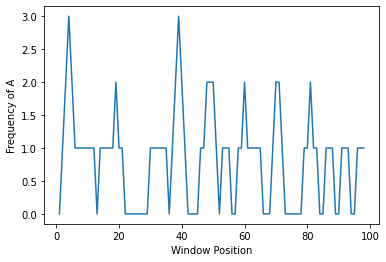

In [122]:
plt.xlabel('Window Position')
plt.ylabel('Frequency of A')

plt.plot(x, master['A'])
plt.show()

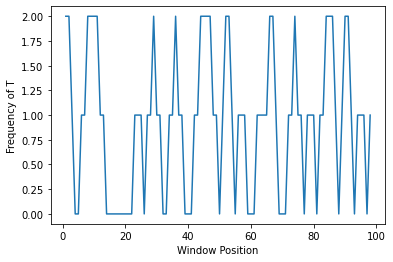

In [123]:
plt.xlabel('Window Position')
plt.ylabel('Frequency of T')

plt.plot(x, master['T'])
plt.show()

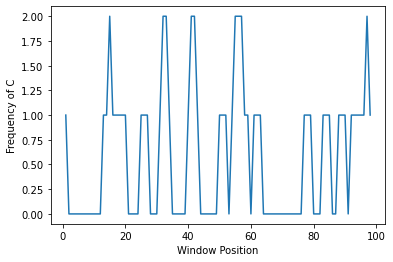

In [124]:
plt.xlabel('Window Position')
plt.ylabel('Frequency of C')

plt.plot(x, master['C'])
plt.show()

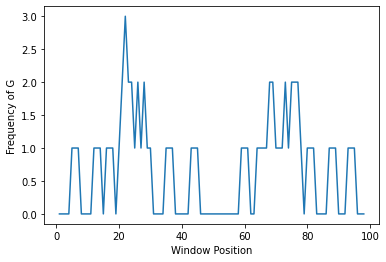

In [125]:
plt.xlabel('Window Position')
plt.ylabel('Frequency of G')

plt.plot(x, master['G'])
plt.show()